In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', -1)

In [2]:
data = pd.read_csv('../../dataset/entityData/merged_465_entity_uri_entity_google_pre.csv',encoding='utf-8', usecols=['sequence1', 'sequence2','uriSequence2'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4473505 entries, 0 to 4473504
Data columns (total 3 columns):
sequence1       object
sequence2       object
uriSequence2    object
dtypes: object(3)
memory usage: 102.4+ MB


In [3]:
data.head(10)

,sequence1,sequence2,uriSequence2
0,the austroasiatic languages in recent classifications synonymous with mon–khmer are a large language family of continental southeast asia also scattered throughout india bangladesh nepal and the southern border of china the name austroasiatic comes from the latin words for south and asia hence south asia of these languages only vietnamese khmer and mon have a long established recorded history and only vietnamese and khmer have official status in vietnam and cambodia respectively the rest of the languages are spoken by minority groups ethnologue identifies <NUMBER> austroasiatic languages these form thirteen established families plus perhaps shompen which is poorly attested as a fourteenth which have traditionally been grouped into two as mon–khmer and munda however one recent classification posits three groups munda nuclear mon khmer and khasi khmuic while another has abandoned mon–khmer as a taxon altogether making it synonymous with the larger family austroasiatic languages have a disjunct distribution across india bangladesh nepal and southeast asia separated by regions where other languages are spoken they appear to be the autochthonous languages of southeast asia with the neighboring indo aryan tai–kadai dravidian austronesian and sino tibetan languages being the result of later migrations,austroasiatic languages mon–khmer language family southeast asia india bangladesh nepal china austroasiatic latin asia south asia vietnamese khmer mon recorded history vietnamese khmer vietnam cambodia ethnologue austroasiatic languages shompen mon–khmer munda munda mon khmer mon–khmer taxon austroasiatic languages disjunct distribution india bangladesh nepal southeast asia autochthonous southeast asia indo aryan dravidian austronesian sino tibetan languages,austro asiatic languages austro asiatic languages language family southeast asia india bangladesh nepal people s republic of china austro asiatic languages roman alphabet asia south asia vietnamese khmer mon recorded history vietnamese khmer vietnam cambodia ethnologue austro asiatic languages shompen language austro asiatic languages munda languages munda languages austro asiatic languages austro asiatic languages taxonomic rank austro asiatic languages disjunct distribution indian poetry bangladesh nepal southeast asia indigenous language southeast asia indo aryan languages dravidian languages austronesian languages sino tibetan languages
1,ada may refer to,ada,ada of caria
2,altruism or selflessness is the principle or practice of concern for the welfare of others it is a traditional virtue in many cultures and a core aspect of various religious traditions and secular worldviews though the concept of others toward whom concern should be directed can vary among cultures and religions altruism or selflessness is the opposite of selfishness the word was coined by the french philosopher auguste comte in french as altruisme for an antonym of egoism he derived it from the italian altrui which in turn was derived from latin alteri meaning other people or somebody else altruism in biological organisms can be defined as an individual performing an action which is at a cost to themselves e g pleasure and quality of life time probability of survival or reproduction but benefits either directly or indirectly another third party individual without the expectation of reciprocity or compensation for that action steinberg suggests a definition for altruism in the clinical setting that is intentional and voluntary actions that aim to enhance the welfare of another person in the absence of any quid pro quo external rewards altruism can be distinguished from feelings of loyalty in that whilst the latter is predicated upon social relationships altruism does not consider relationships much debate exists as to whether true altruism is possible in human psychology the theory of psychological egoism suggests that no act of sharing helping or sacrificing can be describ

In [4]:
def calculateSentLength(sent):
    sent_tokens = str(sent.encode('utf-8')).split()
    return len(sent_tokens)
    

In [5]:
data = data.dropna(subset=['sequence1','sequence2','uriSequence2'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4472223 entries, 0 to 4473504
Data columns (total 3 columns):
sequence1       object
sequence2       object
uriSequence2    object
dtypes: object(3)
memory usage: 136.5+ MB


In [6]:
data['seq1len'] = data['sequence1'].apply(lambda sent:calculateSentLength(sent))
#data['seq1len'] = data['sequence1'].str.split().len()

In [7]:
data['seq2len'] = data['sequence2'].apply(lambda sent:calculateSentLength(sent))

data['uriSeq2len'] = data['uriSequence2'].apply(lambda sent:calculateSentLength(sent))
#data['seq2len'] = data['sequence2'].str.split().len()

In [ ]:
data = data.drop_duplicates(subset=['sequence1'],keep='first')
data = data.reset_index(drop=True)
data.to_csv('../../dataset/merged_465_entity_uri_google_pre_seq.csv',encoding='utf-8',index=False)

In [ ]:
data = pd.read_csv('../../dataset/merged_465_entity_uri_google_pre_seq.csv', encoding='utf-8')
data.info()

In [8]:
data_Analysis = data[['seq1len','seq2len', 'uriSeq2len']]

In [15]:
data_Analysis.describe(include='all')

,seq1len,seq2len,uriSeq2len
count,4.472223e+06,4.472223e+06,4.472223e+06
mean,8.412802e+01,1.601607e+01,2.110721e+01
std,9.307951e+01,1.589957e+01,2.194437e+01
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,2.700000e+01,6.000000e+00,8.000000e+00
50%,5.300000e+01,1.100000e+01,1.400000e+01
75%,1.050000e+02,2.000000e+01,2.600000e+01
max,6.056000e+03,1.056000e+03,1.452000e+03


In [53]:
#sentence range need to be set according to requirement

#data_ranged = data[(data['seq1len']<=50) & (data['seq1len']>=10)]
data_ranged = data[(data['seq1len']<25)]

data_ranged.describe()

,seq1len,seq2len,uriSeq2len
count,983257.000000,983257.000000,983257.000000
mean,15.710873,4.442062,5.851552
std,5.479385,2.390689,3.491944
min,1.000000,1.000000,1.000000
25%,12.000000,3.000000,3.000000
50%,16.000000,4.000000,5.000000
75%,20.000000,6.000000,8.000000
max,24.000000,19.000000,45.000000


In [54]:
data_ranged = data_ranged.reset_index(drop=True)
data_ranged.head(20)

,sequence1,sequence2,uriSequence2,seq1len,seq2len,uriSeq2len
0,ada may refer to,ada,ada of caria,4,1,3
1,austin is the capital of texas in the united states austin may also refer to,austin texas united states austin,austin motor company university of texas at austin united states of america austin motor company,15,5,15
2,alien or aliens may refer to,aliens,fictional extraterrestrial,6,1,2
3,allan dwan 3 april <YEAR> – 28 december <YEAR> was a pioneering canadian born american motion picture director producer and screenwriter,allan dwan american motion picture screenwriter,allan dwan united states of america film director screenwriter,21,6,9
4,aberdeen is a city in scotland united kingdom aberdeen may also refer to,aberdeen scotland united kingdom aberdeen,aberdeen scotland english poetry aberdeen,13,5,5
5,this is a list of characters in ayn rand s novel atlas shrugged,ayn rand atlas shrugged,ayn rand atlas shrugged,13,4,4
6,an animal is a multicellular eukaryotic organism of the kingdom animalia or metazoa animal or animals may also refer to,multicellular eukaryotic organism animalia metazoa,multicellular organism eukaryote organism animal animal,20,5,6
7,an atlas is a collection of maps atlas may also refer to,atlas atlas,atlas atlas languages,12,2,3
8,asterism may refer to,asterism,asterism,4,1,1
9,altenberg german for old mountain may refer to,altenberg,altenberg abbey,8,1,2


[ 1  6 11 16 21 26 31 36 41 46]


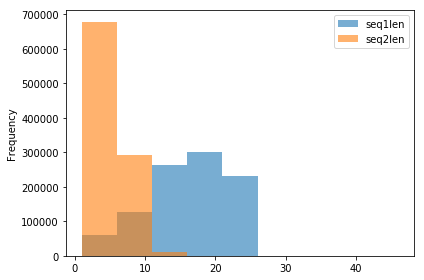

In [55]:
#fig, ax = plt.subplots()
#ax.set_xlim(0,2000)
brange = np.arange(1,50,5)
print (brange[0:10])
plot = data_ranged[['seq1len','seq2len']].plot.hist(bins=brange, histtype='bar', alpha=0.6)
fig = plot.get_figure()
fig.tight_layout()
fig.savefig('seq1lenVsseq2len.png', dpi=120)

[ 1  6 11 16 21 26 31 36 41 46]


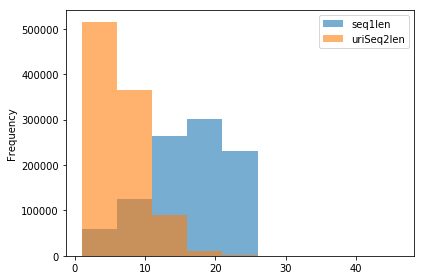

In [56]:
brange = np.arange(1,50,5)
print (brange[0:10])
plot = data_ranged[['seq1len','uriSeq2len']].plot.hist(bins=brange, histtype='bar', alpha=0.6)
fig = plot.get_figure()
fig.tight_layout()
fig.savefig('seq1lenVsuriSeq2len.png', dpi=120)

In [ ]:
sum(data_ranged['seq2len'] < 1)

In [ ]:
data_ranged = data_ranged.reset_index(drop=True)
data_ranged.head(5)
data_ranged.to_csv('../../dataset/merged_465_entity_uri_google_pre_seq_0_50.csv',encoding='utf-8',index=False)

In [ ]:
data_ranged.info()

In [15]:
#dataAnalysis about Entities
df = pd.read_csv('../../dataset/entityData/merged_465_entity_uri_entity_google_pre_seq_0_25.csv', usecols=['uri'], encoding='utf-8')
l = df['uri'].str.split().tolist()
lmod = sorted(set([tmpl1 for tmpl in l for tmpl1 in tmpl]))
print (len(lmod))

df1= pd.read_csv('../../dataset/entity_uri_entity_dups.csv')
print (df1.describe())
df2 = df1[df1['Uri'].isin(lmod)]

def changeLowerCase(str1):
    return str(str1).lower()

df3 = df2.applymap(changeLowerCase)
df3['isEqual'] = df3['Entity'].str.strip().replace('s/+',"") == df3['UriEntity'].str.strip().str.replace('s/+',"")
display (df3.head(5))
print ('Total Entities {}'.format(df3['isEqual'].count()))
print ("Entities which are not equal {}".format(df3['isEqual'].count() - sum(df3['isEqual'])))

299379
                      Entity      Uri        UriEntity
count   924290                924290   924288         
unique  924290                924290   895384         
top     Narva Triumphal Arch  Q424345  NotFoundinQdict
freq    1                     1        5113           


,Entity,Uri,UriEntity,isEqual
0,south road,q1457641,south road,True
5,nampo,q109386,nampho,False
6,nampa,q6962012,nampa high school,False
10,douglas valley,q2014071,river douglas,False
11,dreyfus affair,q173457,dreyfus affair,True


Total Entities 295764
Entities which are not equal 111920


In [16]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295764 entries, 0 to 924288
Data columns (total 4 columns):
Entity       295764 non-null object
Uri          295764 non-null object
UriEntity    295764 non-null object
isEqual      295764 non-null bool
dtypes: bool(1), object(3)
memory usage: 9.3+ MB


In [20]:
df4 = df3[df3['UriEntity']=='notfoundinqdict']

,Entity,Uri,UriEntity,isEqual
693,tax identification number,q7689695,notfoundinqdict,False
910,ninggerum,q12952960,notfoundinqdict,False
1030,indian freedom fighter,q1092790,notfoundinqdict,False
2012,maths & computing,q6786891,notfoundinqdict,False
2561,kanata,q16211887,notfoundinqdict,False
3034,wasting syndrome,q15221048,notfoundinqdict,False
3244,"iowa city broadcasting company, inc.",q6033371,notfoundinqdict,False
4572,merta,q12036411,notfoundinqdict,False
4646,toy wagon,q891447,notfoundinqdict,False
4772,les gaietés de l'escadron,q14949784,notfoundinqdict,False


In [ ]:
#NotFoundWikidataEntites
df = pd.read_csv('../dataset/trainingData/Nov13/formatted_seq_0_25.txt',encoding='utf-8', sep='\t', header=None)
df.head(10)
df.describe()
l = df[df.columns[3]].str.split().tolist()
lmod = sorted(set([tmpl1.strip() for tmpl in l for tmpl1 in tmpl]))
print (len(lmod))
df1= pd.read_csv('../dataset/entity_uri_entity_dups.csv')
df2= df1[df1['UriEntity']=='NotFoundinQdict']
df2.describe()
uriList = sorted(df2['Uri'].tolist())
print (len(uriList), uriList[0:10])

def searchNotfoundUri(uri):
    uri = str(uri).strip().split()
    for u in uri:
        if u in uriList:
            return True
    return False

df['isMatched'] = df[df.columns[3]].apply(searchNotfoundUri)
df[df['isMatched']==True]